<a href="https://colab.research.google.com/github/andrewwells991/mds_thesis/blob/main/13_validation_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Loading packages
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andrewwells991/mds_thesis/main/data/5_applied_ml/model_application_val_df.csv')

In [ ]:
df

,Unnamed: 0,test_df,true_building_count,nb_std_r2,nb_std_mse,nb_std_pred,lr_std_r2,lr_std_mse,lr_std_pred,knn_std_r2,...,rf_over_pred,rf_urban_over_r2,rf_urban_over_mse,rf_urban_over_pred,rf_semi_urban_over_r2,rf_semi_urban_over_mse,rf_semi_urban_over_pred,rf_rural_over_r2,rf_rural_over_mse,rf_rural_over_pred
0,0,proj_1_2,111,-0.111201,0.003085,20.0,-0.219611,0.003386,26.0,-0.138304,...,3.0,-0.111201,0.003085,14.0,-0.011826,0.002809,1.0,-0.002792,0.002784,0.0
1,1,proj_1_3,3568,-0.133131,0.092376,1175.0,-0.101425,0.089791,132.0,-0.000455,...,3664.0,0.972295,0.002259,3654.0,-0.106658,0.090218,427.0,-0.099578,0.089641,18.0
2,2,proj_1_5,4822,-0.188581,0.126392,2428.0,-0.128657,0.120020,640.0,0.063856,...,5143.0,0.914124,0.009132,5186.0,-0.178437,0.125314,1625.0,-0.138566,0.121074,24.0
3,3,proj_1_6,5518,-1.351211,0.280814,11591.0,-0.163087,0.138912,454.0,-0.040213,...,5730.0,0.943823,0.006709,5783.0,-0.186020,0.141651,939.0,-0.164980,0.139138,95.0
4,4,proj_1_7,1622,-0.220482,0.047681,957.0,-0.039884,0.040626,240.0,0.066161,...,1658.0,0.962081,0.001481,1681.0,-0.108653,0.043312,229.0,-0.042455,0.040726,2.0
5,5,proj_3_2,229,-0.207817,0.006904,70.0,-0.071663,0.006125,19.0,-0.049703,...,11.0,-0.032134,0.005899,18.0,-0.018958,0.005824,9.0,-0.005782,0.005749,2.0
6,6,proj_3_3,109,-0.011942,0.002760,19.0,0.006457,0.002710,1.0,-0.067139,...,14.0,-0.140735,0.003111,21.0,-0.039540,0.002835,6.0,-0.002742,0.002735,0.0
7,7,proj_3_4,41,-10.987941,0.012318,456.0,-0.513752,0.001555,21.0,-2.222827,...,38.0,-2.955288,0.004064,127.0,-0.806737,0.001857,39.0,-0.123106,0.001154,5.0
8,8,proj_3_5,29,-5.004372,0.004369,177.0,-0.311300,0.000954,9.0,-0.173268,...,1.0,-0.242284,0.000904,9.0,-0.000729,0.000728,2.0,-0.000729,0.000728,0.0
9,9,proj_3_10,135,-0.114892,0.003768,21.0,-0.010835,0.003416,1.0,-0.204083,...,26.0,-6.083280,0.023939,828.0,-0.047998,0.003542,6.0,-0.003403,0.003391,0.0


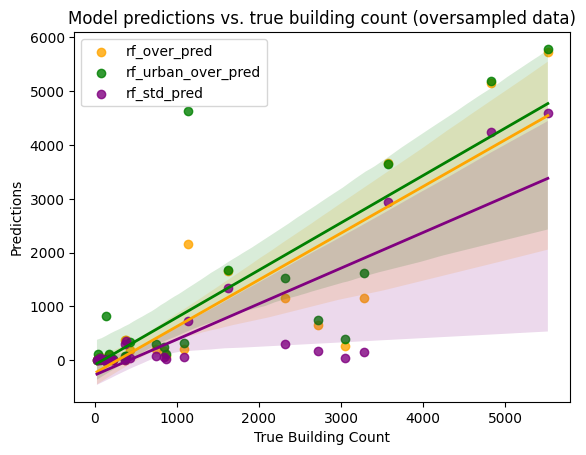

In [ ]:
# Define a list of colors and marker styles for each model type
colors = {'rf_over_pred': 'orange', 'rf_urban_over_pred': 'green', 
          'rf_std_pred': 'purple'}
          
markers = {'rf_over_pred': 's', 'rf_urban_over_pred': '^', 
          'rf_std_pred': '*'}

# Create a scatter plot with different colors for each model type
for model_type, color in colors.items():
    sns.regplot(x='true_building_count', y=model_type, data = df, scatter_kws={"color": color, "marker": markers[model_type]}, 
                line_kws={"color": color, "linewidth": 2}, label=model_type)

# Set the axis labels and title
plt.xlabel('True Building Count')
plt.ylabel('Predictions')
plt.title('Model predictions vs. true building count (oversampled data)')

# Add a legend
plt.legend(loc="upper left")

# Show the plot
plt.show()

##Graphing R-square

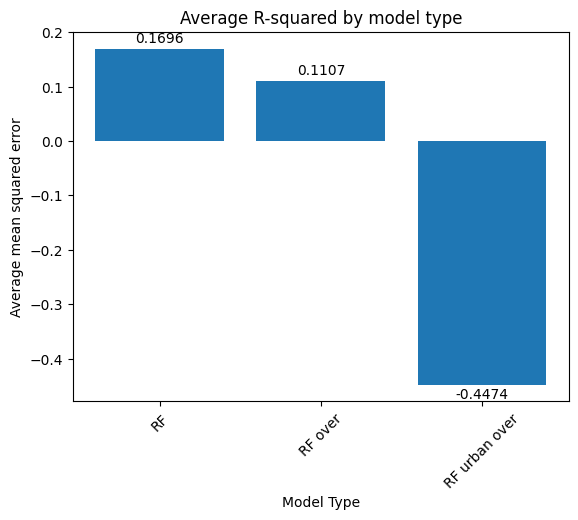

In [ ]:
# Calculate the average r-square score for each variable
avg_r2 = [df['rf_std_r2'].mean(), df['rf_over_r2'].mean(),
          df['rf_urban_over_r2'].mean()]

# Define the x-axis labels and tick positions
x_labels = ['RF', 'RF over',
            'RF urban over']

x_ticks = range(len(x_labels))

# Create a bar plot of the average r-square scores
fig, ax = plt.subplots()
bars = ax.bar(x_ticks, avg_r2)

# Set the axis labels and title
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_xlabel('Model Type')
ax.set_ylabel('Average mean squared error')
ax.set_title('Average R-squared by model type')

# Add mean value annotations within the bars
ax.bar_label(bars, labels=[f'{round(val, 4)}' for val in avg_r2], padding=2)

# Show the plot
plt.show()

##Mean square error

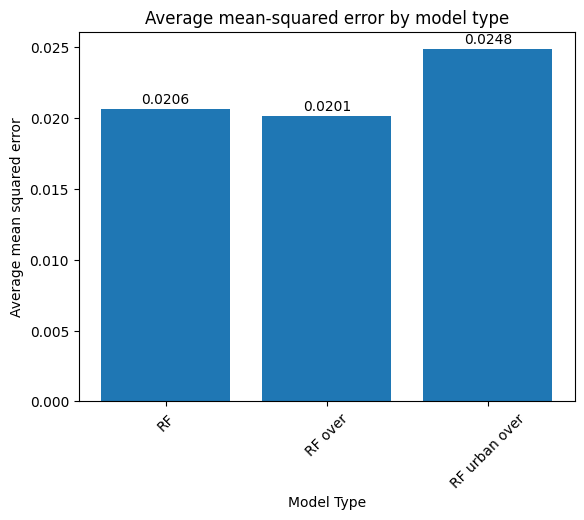

In [ ]:
# Calculate the average r-square score for each variable
avg_r2 = [df['rf_std_mse'].mean(), df['rf_over_mse'].mean(),
          df['rf_urban_over_mse'].mean()]

# Define the x-axis labels and tick positions
x_labels = ['RF', 'RF over',
            'RF urban over']

x_ticks = range(len(x_labels))

# Create a bar plot of the average r-square scores
fig, ax = plt.subplots()
bars = ax.bar(x_ticks, avg_r2)

# Set the axis labels and title
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_xlabel('Model Type')
ax.set_ylabel('Average mean squared error')
ax.set_title('Average mean-squared error by model type')

# Add mean value annotations within the bars
ax.bar_label(bars, labels=[f'{round(val, 4)}' for val in avg_r2], padding=2)

# Show the plot
plt.show()